In [4]:
import numpy as np
import matplotlib.pyplot as plt
from fatiando.seismic import conv
from fatiando.vis import mpl

C:\Anaconda3\envs\fatiando\lib\site-packages\fatiando\vis\mpl.py:76: UserWarning: This module will be removed in v0.6. We recommend the use of matplotlib.pyplot module directly. Some of the fatiando specific functions will remain.
  "specific functions will remain.")


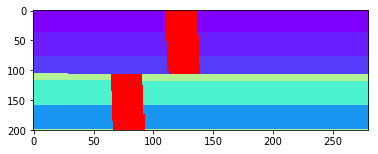

In [5]:
fileName="su/out_0001_xz275.su"
data=np.fromfile(fileName,dtype=np.dtype('>d')).reshape(-1,200).T
# Define the parameters of our depth model
n_samples, n_traces = data.shape
plt.imshow(data, aspect=.5, cmap="rainbow")
plt.show()

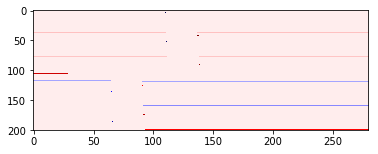

In [6]:
rho = 2200*np.ones(np.shape(data))
rc = conv.reflectivity(data,rho)
plt.imshow(rc, aspect=.5, cmap="seismic")
plt.show()

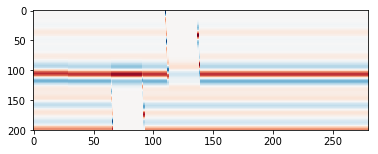

In [15]:
synt = conv.convolutional_model(rc, 80, conv.rickerwave, dt=4e-4)
plt.imshow(synt, aspect=.5, cmap="RdBu_r")
plt.show()

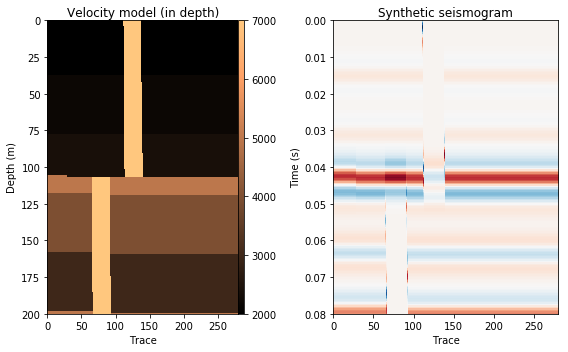

In [75]:
# We can use the utility function in fatiando.vis.mpl to plot the seismogram
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

ax = axes[0]
ax.set_title("Velocity model (in depth)")
tmp = ax.imshow(data, extent=[0, n_traces, n_samples, 0],
                cmap="copper", aspect='auto', origin='upper')
fig.colorbar(tmp, ax=ax, pad=0, aspect=50)
ax.set_xlabel('Trace')
ax.set_ylabel('Depth (m)')

ax = axes[1]
ax.set_title("Synthetic seismogram")
mpl.seismic_image(synt, dt=4.e-4, cmap="RdBu_r", aspect='auto')
ax.set_xlabel('Trace')
ax.set_ylabel('Time (s)')
plt.tight_layout()
plt.show()

In [24]:
import os
from scipy import misc
for filename in os.listdir("su"):
    if filename.endswith(".su"):
        name=os.path.splitext(filename)[0] 
        data=np.fromfile("su/"+filename,dtype=np.dtype('>d')).reshape(-1,200).T
        n_samples, n_traces = data.shape
        rho = 2200*np.ones(np.shape(data))
        rc = conv.reflectivity(data,rho)
        synt0 = conv.convolutional_model(rc, 50, conv.rickerwave, dt=4e-4)
        synt1=conv.convolutional_model(rc, 80, conv.rickerwave, dt=4e-4)
        synt2=conv.convolutional_model(rc, 100, conv.rickerwave, dt=4e-4)
        synt3=conv.convolutional_model(rc, 120, conv.rickerwave, dt=4e-4)
        misc.imsave(name+"-input.png",data)
        misc.imsave(name+"-synth-.png",synt0)        
        continue
    else:
        continue

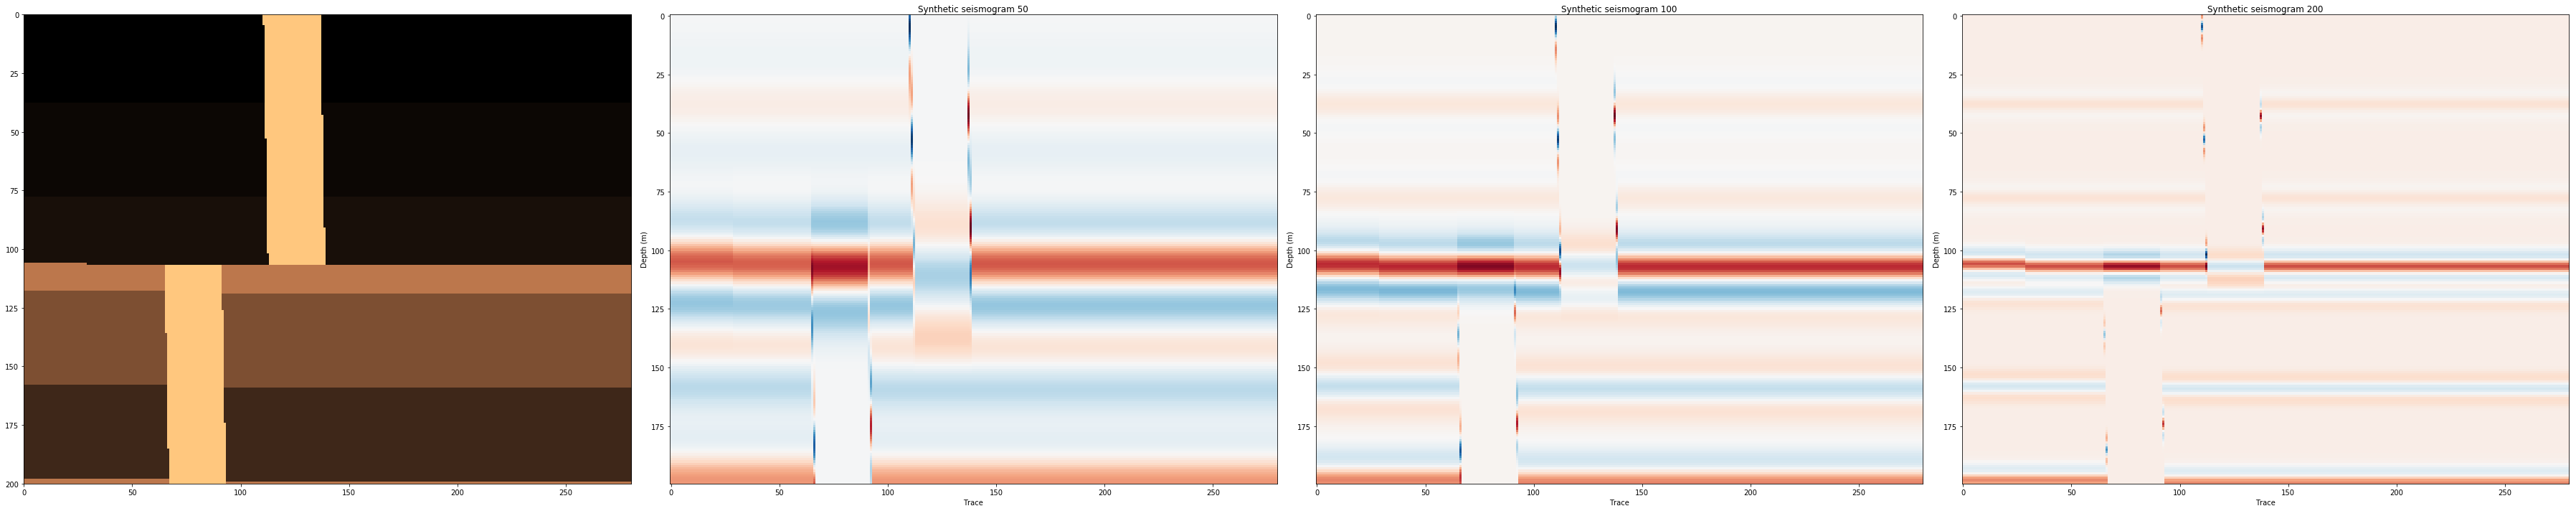

In [55]:
f, axes = plt.subplots(1, 4, figsize=(50, 10))
ax = axes[0]
tmp = ax.imshow(data, extent=[0, n_traces, n_samples, 0],
                cmap="copper", aspect='auto', origin='upper')

ax = axes[1]
ax.set_title("Synthetic seismogram 50")
synt1=conv.convolutional_model(rc, 50, conv.rickerwave, dt=4e-4)
ax.imshow(synt1, cmap="RdBu_r", aspect='auto')
ax.set_xlabel('Trace')
ax.set_ylabel('Depth (m)')
ax = axes[2]
ax.set_title("Synthetic seismogram 100")
synt2=conv.convolutional_model(rc, 100, conv.rickerwave, dt=4e-4)
ax.imshow(synt2, cmap="RdBu_r", aspect='auto')
ax.set_xlabel('Trace')
ax.set_ylabel('Depth (m)')
ax = axes[3]
ax.set_title("Synthetic seismogram 200")
synt3=conv.convolutional_model(rc, 200, conv.rickerwave, dt=4e-4)
ax.imshow(synt3, cmap="RdBu_r", aspect='auto')
ax.set_xlabel('Trace')
ax.set_ylabel('Depth (m)')
plt.tight_layout()
plt.show()

In [104]:
import os
f_handle50 = "synth-ricker-50"
f_handle80 = "synth-ricker-80"
f_handle100 = "synth-ricker-100"
f_handle120 = "synth-ricker-120"
f_handledata ="input"


if not os.path.exists(f_handle50):
    os.makedirs(f_handle50)
if not os.path.exists(f_handle80):
    os.makedirs(f_handle80)
if not os.path.exists(f_handle100):
    os.makedirs(f_handle100)
if not os.path.exists(f_handle120):
    os.makedirs(f_handle120)
if not os.path.exists(f_handledata):
    os.makedirs(f_handledata)

for filename in os.listdir("su"):
    if filename.endswith(".su"):
        name=os.path.splitext(filename)[0] 
        data=np.fromfile("su/"+filename,dtype=np.dtype('>d')).reshape(-1,200).T
        n_samples, n_traces = data.shape
        rho = 2200*np.ones(np.shape(data))
        rc = conv.reflectivity(data,rho)
        synt0 = conv.convolutional_model(rc, 50, conv.rickerwave, dt=4e-4)
        synt1=conv.convolutional_model(rc, 80, conv.rickerwave, dt=4e-4)
        synt2=conv.convolutional_model(rc, 100, conv.rickerwave, dt=4e-4)
        synt3=conv.convolutional_model(rc, 120, conv.rickerwave, dt=4e-4)
        np.save(f_handle50+"/"+name+".npy", synt0)
        np.save(f_handle80+"/"+name+".npy", synt1)
        np.save(f_handle100+"/"+name+".npy", synt2)
        np.save(f_handle120+"/"+name+".npy", synt3)
        np.save(f_handledata+"/"+name+".npy", data)
             
        continue
    else:
        continue

print('Alright.')

Alright.


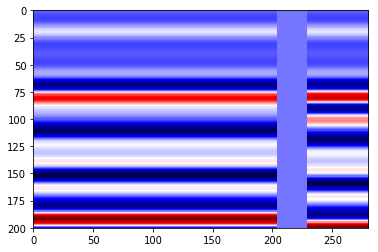

In [22]:
test=np.load("synth-ricker-80/out_0002_xz125.npy")
n_samples, n_traces = test.shape
plt.imshow(test, extent=[0, n_traces, n_samples, 0],
                cmap="seismic", aspect='auto', origin='upper')
plt.show()

In [10]:
import bruges

wavel=bruges.filters.ormsby(.1,4e-4,[4,10,100,150])

ormsynt=np.apply_along_axis(lambda m: np.convolve(m, wavel, mode='full'), axis=0, arr=rc)

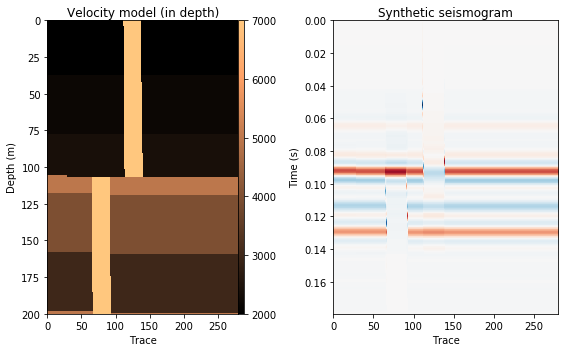

In [12]:
# We can use the utility function in fatiando.vis.mpl to plot the seismogram
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

ax = axes[0]
ax.set_title("Velocity model (in depth)")
tmp = ax.imshow(data, extent=[0, n_traces, n_samples, 0],
                cmap="copper", aspect='auto', origin='upper')
fig.colorbar(tmp, ax=ax, pad=0, aspect=50)
ax.set_xlabel('Trace')
ax.set_ylabel('Depth (m)')

ax = axes[1]
ax.set_title("Synthetic seismogram")
mpl.seismic_image(ormsynt, dt=4.e-4, cmap="RdBu_r", aspect='auto')
ax.set_xlabel('Trace')
ax.set_ylabel('Time (s)')
plt.tight_layout()
plt.show()

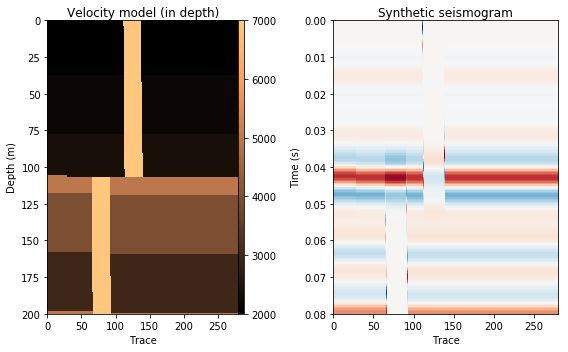

In [16]:
# We can use the utility function in fatiando.vis.mpl to plot the seismogram
fig, axes = plt.subplots(1, 2, figsize=(8, 5))

ax = axes[0]
ax.set_title("Velocity model (in depth)")
tmp = ax.imshow(data, extent=[0, n_traces, n_samples, 0],
                cmap="copper", aspect='auto', origin='upper')
fig.colorbar(tmp, ax=ax, pad=0, aspect=50)
ax.set_xlabel('Trace')
ax.set_ylabel('Depth (m)')

ax = axes[1]
ax.set_title("Synthetic seismogram")
mpl.seismic_image(synt, dt=4.e-4, cmap="RdBu_r", aspect='auto')
ax.set_xlabel('Trace')
ax.set_ylabel('Time (s)')
plt.tight_layout()
plt.show()

In [17]:
import os
f_handleorms = "synth-orms"

if not os.path.exists(f_handleorms):
    os.makedirs(f_handleorms)

for filename in os.listdir("su"):
    if filename.endswith(".su"):
        name=os.path.splitext(filename)[0] 
        data=np.fromfile("su/"+filename,dtype=np.dtype('>d')).reshape(-1,200).T
        n_samples, n_traces = data.shape
        rho = 2200*np.ones(np.shape(data))
        rc = conv.reflectivity(data,rho)
        syntorms = conv.convolutional_model(rc, 50, conv.rickerwave, dt=4e-4)
        np.save(f_handleorms+"/"+name+".npy", syntorms)
             
        continue
    else:
        continue

print('Alright.')

Alright.


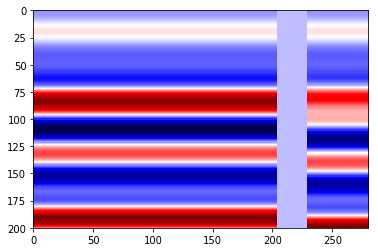

In [21]:
test=np.load("synth-orms/out_0002_xz125.npy")
n_samples, n_traces = test.shape
plt.imshow(test, extent=[0, n_traces, n_samples, 0],
                cmap="seismic", aspect='auto', origin='upper')
plt.show()